# EDA

In [35]:
%%time

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from zipfile import ZipFile

sns.set(color_codes=True)

CPU times: user 2.67 ms, sys: 0 ns, total: 2.67 ms
Wall time: 2.49 ms


## Reading


In [34]:
%%time

path = './dataset/2nd_test.zip'
zip_file = ZipFile(path)
df_values = list()
df_index = list()
for file in zip_file.infolist()[1:]:
    with zip_file.open(file.filename) as f:
        dft = pd.read_csv(f, sep='\t')
        df_values.append(dft.abs().mean().values)
        df_index.append(file.filename.split('/')[1])
        
df = pd.DataFrame(df_values)
df.index = df_index
df.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

print(len(df))
df.head()

984
CPU times: user 8.67 s, sys: 78.3 ms, total: 8.75 s
Wall time: 8.79 s


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.12.10.32.39,0.058333,0.071832,0.083242,0.043067
2004.02.12.10.42.39,0.058995,0.074006,0.084435,0.044541
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118


In [37]:
df.index = pd.to_datetime(df.index, format='%Y.%m.%d.%H.%M.%S')
df = df.sort_index()
df.to_csv(os.path.join('dataset', 'cleaned_df_2nd.csv'))
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


## First two day simulate the normal data, the rest the test data until the sensor fails.


**Training**

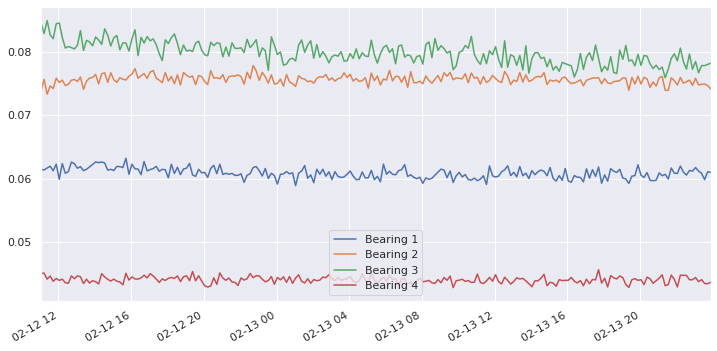

In [38]:
X_train = df['2004-02-12 11:02:39':'2004-02-13 23:52:39']
X_test = df['2004-02-13 23:52:39':]
X_train.plot(figsize = (12,6));


**Testing**

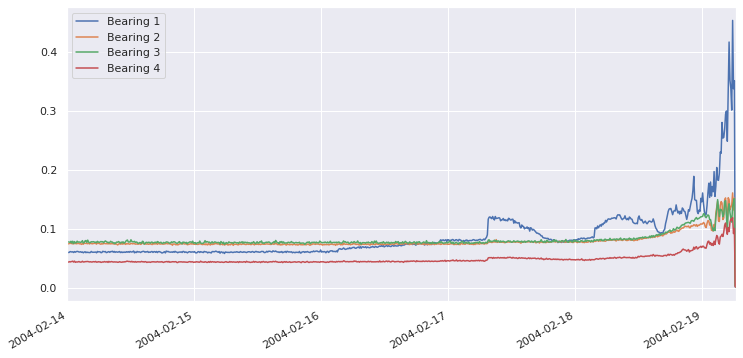

In [39]:
X_test.plot(figsize = (12,6));

# Preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns, 
                              index=X_train.index)
# Random shuffle training data
# X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(X_test), 
                             columns=X_test.columns, 
                             index=X_test.index)
